In [1]:
import numpy as np
import random
import joblib

from numpy import linalg as LA
import matplotlib.pyplot as plt
plt.style.use('default')
from numpy.linalg import inv
import copy


## Deterministic average ratios of mutants

### Useful functions

In [2]:
#Usual function to define the migration matrix of the star
#equal_contribution is True if lines sum to 1 (all demes send out K), False if columns sum to 1 (all demes receive K)

def define_star(N_demes,mI,mO,equal_contribution=True):
    migration_matrix=np.zeros((N_demes,N_demes))
    for i in range(1,N_demes):
        migration_matrix[i,0]=mI
        migration_matrix[0,i]=mO
        if equal_contribution:
            migration_matrix[i,i]=1-mI
        else:
            migration_matrix[i,i]=1-mO
    if equal_contribution:
        migration_matrix[0,0]=1-(N_demes-1)*mO 
    else:
        migration_matrix[0,0]=1-(N_demes-1)*mI 
    return migration_matrix

In [3]:
#Ratios at the end of the growth phase
def growth_event(ratios,s,t):
    l=ratios.shape[0]
    r=np.zeros(l).astype(np.float64)
    for i in range(l):
        r[i]=ratios[i]*np.exp(s*t)/(1+ratios[i]*(np.exp(s*t)-1))
    return r.astype(np.float64)

In [4]:
#Ratios at bottleneck after one phase of growth/dilution
def one_step(x,migration_matrix,s,t):
    return np.dot(np.transpose(migration_matrix),growth_event(x,s,t)).astype(np.float64)


In [5]:
#Computes ratios at bottleneck at the first nb_steps of growth/dilution
def ratio_evolution(in_x,nb_steps,D,mI,mO,s,t,equal_contribution=False):
    ratios=np.zeros((nb_steps,D)).astype(np.float64)
    ratios[0]=in_x.copy()
    M=define_star(D,mI,mO,equal_contribution)
    for i in range(1,nb_steps):
        ratios[i]=one_step(ratios[i-1], M,s,t)
    return ratios

### Example: OUT>IN regime

In [6]:
#Example with usual parameters
mI=1e5/(1e7+3e5)
mO=3e5/(1e7+3e5)
in_x=np.array([1/1000,0,0,0]).astype(np.float64)
one_step(in_x, define_star(4,mI,mO,equal_contribution=False),0.2,np.log(100))

array([2.43504318e-03, 7.30512955e-05, 7.30512955e-05, 7.30512955e-05])

In [7]:
#Parameters for high and low migration
mI_high=1e5/(1e7+3e5)
mO_high=3e5/(1e7+3e5)
mI_low=1e2/(1e7+3e2)
mO_low=3e2/(1e7+3e2)
in_x=np.array([0,1/1000,0,0]).astype(np.float64)
D=4
s=0.2
t=np.log(100)

In [8]:
#Computing ratios for the first 25 and 45 steps
outin_high=ratio_evolution(in_x,25,D,mI_high,mO_high,s,t,equal_contribution=False)
outin_low=ratio_evolution(in_x,45,D,mI_low,mO_low,s,t,equal_contribution=False)


In [9]:
#Extracting ratios in each deme
outin_low_center=outin_low[:,0]
outin_low_leaf1=outin_low[:,1]
outin_low_leaf2=outin_low[:,2]
outin_low_leaf3=outin_low[:,3]

outin_high_center=outin_high[:,0]
outin_high_leaf1=outin_high[:,1]
outin_high_leaf2=outin_high[:,2]
outin_high_leaf3=outin_high[:,3]

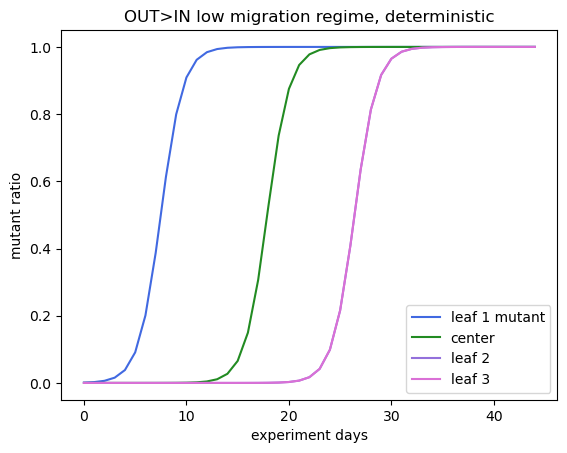

In [12]:
plt.title(r'OUT>IN low migration regime, deterministic')
exp_days_low=np.arange(0,45,1)
plt.plot(exp_days_low,outin_low_leaf1, color='royalblue',label='leaf 1 mutant')
plt.plot(exp_days_low,outin_low_center, color='forestgreen',label='center')
plt.plot(exp_days_low,outin_low_leaf2, color='mediumpurple',label='leaf 2')
plt.plot(exp_days_low,outin_low_leaf3, color='orchid',label='leaf 3')

plt.xlabel('experiment days')
plt.ylabel('mutant ratio')
plt.legend()

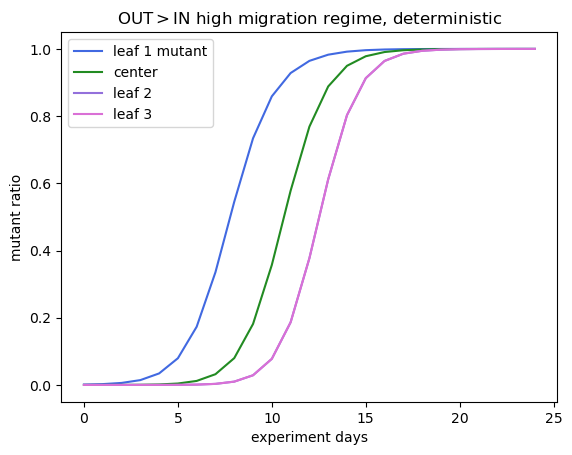

In [11]:
plt.title(r'OUT$>$IN high migration regime, deterministic')
exp_days_high=np.arange(0,25,1)
plt.plot(exp_days_high,outin_high_leaf1, color='royalblue',label='leaf 1 mutant')
plt.plot(exp_days_high,outin_high_center, color='forestgreen',label='center')
plt.plot(exp_days_high,outin_high_leaf2, color='mediumpurple',label='leaf 2')
plt.plot(exp_days_high,outin_high_leaf3, color='orchid',label='leaf 3')

plt.xlabel('experiment days')
plt.ylabel('mutant ratio')
plt.legend()